# **Image Morphology II: "Image Morphology meets Cellular Morphology"** 

Andrew Effat ([andrew.effat@mail.utoronto.ca](https://)), 
\
Caryn Geady ([caryn.geady@mail.utoronto.ca](https://)),
\
Maria Sebastian ([mariasonia.sebastian@mail.utoronto.ca](https://))


### **Learning Objectives**
*   **Imaging Filling** 
*   **Connected Components** 
*   **Skeletonization**

### **General Format** 
*   The **MATH** aka relevant theory
*   The **CODE** aka simulation on simple, binary images
*   The **APPLICATION** aka playing with biological images 

<div class="alert alert-block alert-success">
<b>
In green cells, we will stop to experiment with the code blocks and discuss technical concepts.
</b> 
</div>
<div class="alert alert-block alert-info">
<b>
In blue cells, supplementary information will be provided.
</b> 
</div>
<div class="alert alert-block alert-warning">
<b>
In yellow cells, task-specific information will be provided.
</b> 
</div>

## **Image Filling**

### **The MATH**
From Image Morphology I, we know that dilating (or closing, depending on the objective) an image tends to fill small holes in image foregrounds. We can extend this to filling larger holes if we have a single pixel coordinate inside or on the inner boundary of the hole. To see how to do this, imagine *p* is a pixel inside a hole H in an image $A$ and consider $P$ to be an image, the same size as $A$ with the single pixel at *p* in the foreground. Suppose $B$ is a structuring element that is small enough that it cannot cross from the hole H to any other hole. Now consider the sequence:
* $X_1 = (P⊕B)∩A^C$
* $X_2 = (X_1⊕B)∩A^C$
* $X_3 = (X_2⊕B)∩A^C$
* ...

Notice that at each step, the original pixel group is dilated, but is then intersected with the image compliment. Thus when the dilation includes any pixels in the image foreground, these are removed. The only place the initial pixel can dilate to is the hole H in the image foreground where $P$ is located. This sequence may be iterated until it "converges" and $X_{n+1} = X_n$. 

### **The CODE**
Okay, enough with the mathematics already! What does this *actually* look like on an image?

In [1]:
# import code for image generation/simulation
import supplemental.functionals as f

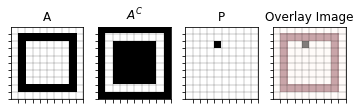

In [2]:
# this is a simple A and P image, as described in 'The MATH' section
# (A complement also shown for image filling algorithm)
A_imfill,P = f.generateImages('imagefill')

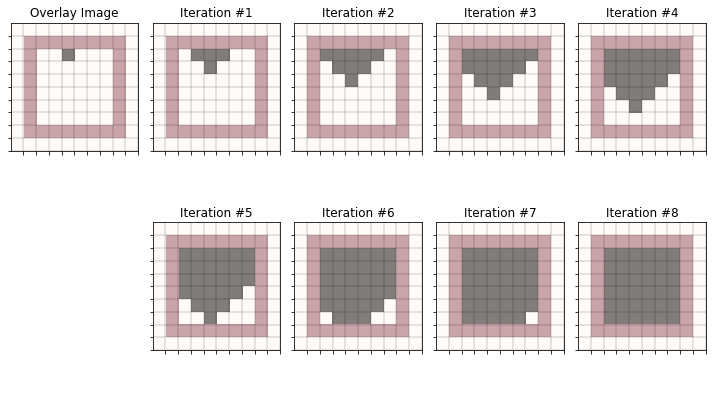

In [3]:
from skimage.morphology import diamond, square    # <-- structuring elements

B_cross = diamond(radius = 1)                     # simulates 1(4) connectivity
B_square = square(width = 3)                      # simulates 2(8) connectivity

A_imfill[2,1] = True                              # change to False to remove pixel from foreground 

# f.imagefillSim
#   INPUTS: • target image,
#           • our single foreground pixel image/starting point,
#           • structuring element

f.imagefillSim(A_imfill,P,B_cross)                

<div class="alert alert-block alert-success">
<b>
How does changing the structuring element affect the results? (i.e., How important is connectivity here?) Does the algorithm 'converge' faster or slower?  
<br>
    
Try some experiments:
    <ul>
        <li>alternating between 1-connectivity and 2-connectivity,</li>
        <li>adjusting the radius/width parameter of the structuring element and</li> 
        <li>removing a pixel from the foreground.</li>
        </ul>
</b> 
</div>

## **Connected Components**

### **The MATH**
A similar sequence works to find the components connected to a given foreground pixel *p* in a BW image $A$. Suppose $P$ is an image, the same size as $A$ with the single pixel at *p* in the foreground and $B$ is a structuring element of appropriate connectivity. Consider the sequence:

* $X_1 = (P⊕B)∩A$
* $X_2 = (X_1⊕B)∩A$
* $X_3 = (X_2⊕B)∩A$
* . . .

At each dilation, the size of $X$ is increased, but the intersection with $A$ ensures that any pixels added from outside the connected component, get dropped. The $X_i$ expand only into the connected component containing the original point *p*.

### **The CODE**
Again, enough with the mathematics already! What does this *actually* look like on an image?

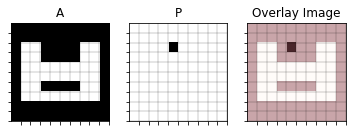

In [4]:
# this is a simple A and P image, as described in 'The MATH' section
A_conncomp,P = f.generateImages('conncomp')

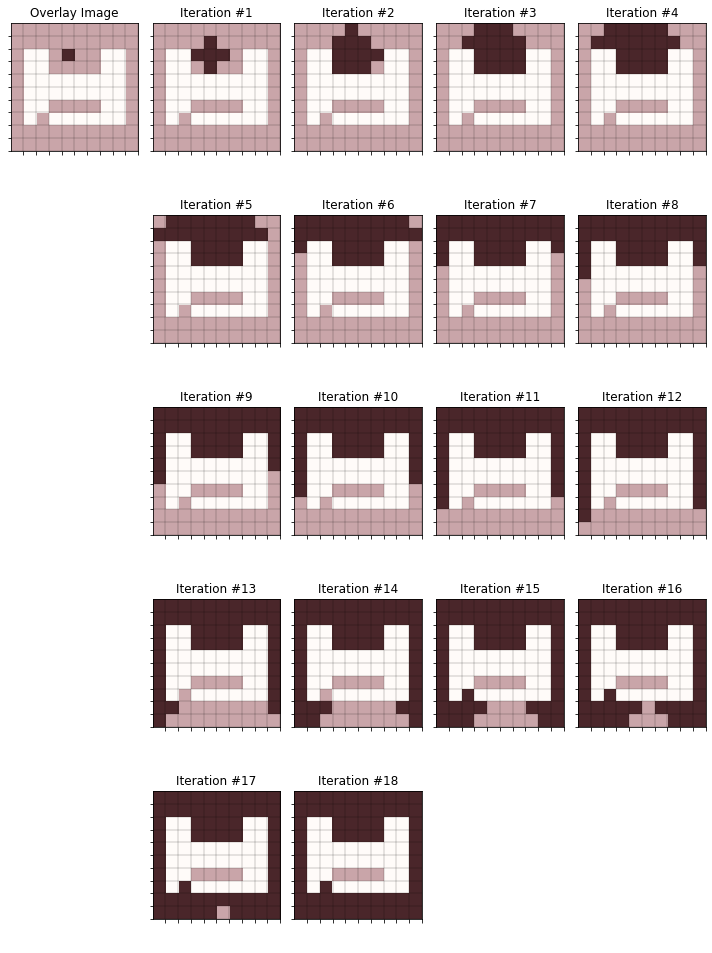

In [12]:
# RECALL:
B_cross = diamond(radius = 1)                     # simulates 1(4) connectivity
B_square = square(width = 3)                      # simulates 2(8) connectivity

A_conncomp[7,2] = True
# change to True to add pixel to foreground

# f.conncompSim
#   INPUTS: • target image,
#           • our single foreground pixel image/starting point,
#           • structuring element

f.conncompSim(A_conncomp,P,B_cross)              

<div class="alert alert-block alert-success">
<b>
How does changing the structuring element affect the results? (i.e., How important is connectivity here?) Does the algorithm 'converge' faster or slower?  
<br>
    
Try some experiments:
    <ul>
        <li>alternating between 1-connectivity and 2-connectivity,</li>
        <li>adjusting the radius/width parameter of the structuring element and</li> 
        <li>add or remove a pixel from the foreground.</li>
        </ul>
</b> 
</div>

## **The APPLICATION**
The estimation of the nuclear-to-cell ratio (N:C ratio) is an important factor in diagnosing atypia and malignancy in pathological specimens, particularly in cytology. In the following cells, we will walk through a simple image morphology pipeline to determine the N:C ratio of a sample image.

Image dimensions: (339, 318, 4)
Image dtype: uint8


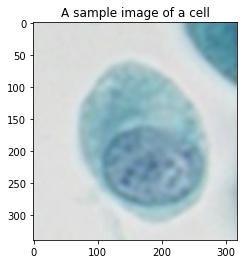

In [13]:
from skimage import io
import matplotlib.pyplot as plt

cell = io.imread('supplemental/cell.png')

# display image and specs
plt.imshow(cell)
plt.title('A sample image of a cell')
print('Image dimensions: {}'.format(cell.shape))
print('Image dtype: {}'.format(cell.dtype))

<div class="alert alert-block alert-info">
<b> 
Cytology Staining: The universal stain for cytological preparations is the Papanicolaou stain. Harris’ hematoxylin is the optimum nuclear stain and the combination of OG6 and EA50 give the subtle range of green, blue and pink hues to the cell cytoplasm. The result of the stain: the nuclei should appear blue/black and the cytoplasm should appear blue/green.
<br>
    
Image Credit: [Young Investigator Challenge: The Accuracy of the
Nuclear-to-Cytoplasmic Ratio Estimation Among Trained Morphologists by Vaickus and Tambouret](https://acsjournals.onlinelibrary.wiley.com/doi/10.1002/cncy.21585); published in Cancer Cytopathology in 2015.
<br>
    
Morphological Operations: will be performed on *binary* images. 
<br>
    
Code: Extended notebook available (`supplemental/NC Ratio.ipynb`).
</b> 
</div>

### **Thresholding**
As a first step, we will isolate the cellular and nuclear outlines by applying a global threshold to the different colour channels in the image.

<div class="alert alert-block alert-warning">
<b>
<b>Task-Dependance and Subjectivity</b>
    
It is important to note that the *choice* of which method to use for thresholding is clearly task-dependant and *somewhat* subjective. What you can do, prior to making any concrete decisions, is to simply try different thresholding methods to see which yields the optimal result for the task. You can uncomment the code below to experiment with different methods on the grayscale image of the cell.
</b> 
</div>

In [ ]:
# from skimage.filters import try_all_threshold
# from skimage.color import rgb2gray

# gray_image = rgb2gray(cell)

# fig, axes = try_all_threshold(gray_image, figsize=(10, 8), verbose=False)
# plt.show()

In [14]:
# apply global threshold to isolate the whole cell and nucleus
from skimage.filters import threshold_yen

# threshold_yen?

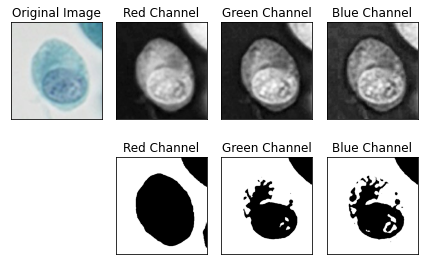

In [15]:
# look at the different channels in the image
channels = ['Reds','Greens','Blues']

# display different channels in the RGB image
fig, axes = plt.subplots(nrows=2, ncols=4)

# colour channels + greyscale image
for i in range(2):
    if i == 0:
        axes[i,0].imshow(cell)
        axes[i,0].set_xticks([])
        axes[i,0].set_yticks([])
        axes[i,0].set_title('Original Image')
    else:
        axes[i,0].axis('off')
        
    for j in range(1,4):
        if i == 0:
            axes[i,j].imshow(cell[:,:,j-1], cmap='Greys') 
            #axes[i,j].imshow(cell[:,:,j-1], cmap=channels[j-1]) # uncomment to see pretty colours  :)
            axes[i,j].set_xticks([])
            axes[i,j].set_yticks([])
            axes[i,j].set_title('{} Channel'.format(channels[j-1][:-1]))
            continue
        else:
            axes[i,j].imshow(cell[:,:,j-1] < threshold_yen(cell[:,:,j-1]),cmap='Greys')
            axes[i,j].set_xticks([])
            axes[i,j].set_yticks([])
            axes[i,j].set_title('{} Channel'.format(channels[j-1][:-1]))
            
fig.tight_layout()

In [16]:
# clearly the yen threshold on the red channel was most effective at isolating the cellular outline
binary_cell_image = cell[:,:,0] < threshold_yen(cell[:,:,0])

# the threshold on the blue channel worked fairly well, but it needs to be cleaned up
binary_nucl_image = cell[:,:,2] < threshold_yen(cell[:,:,2])

### **Clean-up and Fill**
As a second step, we will fill the binary nuclear image and then open the image to remove extrusions and smooth the nuclear outline.

In [17]:
# filling algorithm -- image morphology!
from scipy.ndimage.morphology import binary_fill_holes
from skimage.morphology import reconstruction
import numpy as np

# binary_fill_holes?
# reconstruction?

<div class="alert alert-block alert-warning">
<b>
<b>Computational Complexity</b>
    
The `reconstruction` function in `skimage` can do more than fill holes! Specific example for hole-filling [here](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_holes_and_peaks.html#sphx-glr-auto-examples-features-detection-plot-holes-and-peaks-py). For our purposes, `scipy`'s `binary_fill_holes` is more fitting to use, and is less expensive, computationally.
</b> 
</div>

Text(0.5, 1.0, 'Filled Image')

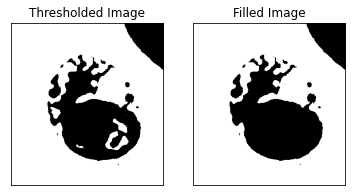

In [18]:
# fill the image using scipy
filled_image = binary_fill_holes(binary_nucl_image)

# display
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.rcParams['figure.figsize'] = [10, 20]
axes[0].imshow(binary_nucl_image,cmap='Greys')
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_title('Thresholded Image')
axes[1].imshow(filled_image,cmap='Greys')
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_title('Filled Image')

Text(0.5, 1.0, 'Nucleus Segmentation')

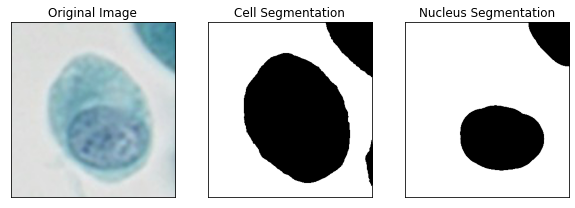

In [19]:
from skimage.morphology import binary_opening, disk
# opening the image removes extrusions and smooths the nuclear outline

rad = 45
binary_nucl_image_clean = binary_opening(filled_image, selem = disk(radius = rad))

# display cell and nucleus segmentation
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].imshow(cell,cmap='Greys')
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_title('Original Image')
axes[1].imshow(binary_cell_image,cmap='Greys')
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_title('Cell Segmentation')
axes[2].imshow(binary_nucl_image_clean,cmap='Greys')
axes[2].set_xticks([])
axes[2].set_yticks([])
axes[2].set_title('Nucleus Segmentation')

### **Connected Regions**
As a third step, we will use the connected components algorithm (implemented in label, below) to isolate the connected regions in each image. Each region has unique properties, including area (i.e., number of pixels). We will use these to calculate the nuclear-to-cell ratio.

In [20]:
# connected components algorithm -- image morphology!
from scipy import ndimage
from skimage.measure import label 

# ndimage.label?
# label?

In [21]:
cell_labels,num_cells = label(binary_cell_image, background=0, 
                              connectivity=2,return_num=True)
nucl_labels,num_nucl = label(binary_nucl_image_clean,background=0, 
                             connectivity=2,return_num=True)

print('Number of connected regions in cell image: {}'.format(num_cells))
print('Number of connected regions in nucleus image: {}'.format(num_nucl))

Number of connected regions in cell image: 3
Number of connected regions in nucleus image: 2


Text(0.5, 1.0, 'Labelled Nucleus Image: 2 Connected Regions')

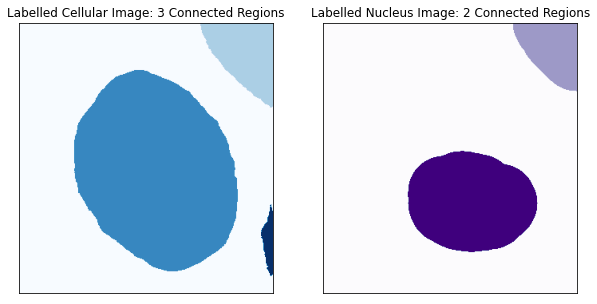

In [22]:
# display original image and classification
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(cell_labels,cmap='Blues')
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_title('Labelled Cellular Image: {} Connected Regions'.format(num_cells))
axes[1].imshow(nucl_labels,cmap='Purples')
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_title('Labelled Nucleus Image: {} Connected Regions'.format(num_nucl))

### **Results**
Finally, we can visualize the fruits of our labour! Extended notebook with calculations available (`supplemental/NC Ratio.ipynb`).

Text(0.5, 1.0, 'Labelled Image')

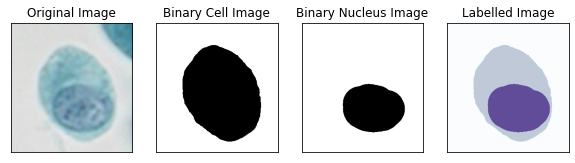

In [23]:
# display original image and results
fig, axes = plt.subplots(nrows=1, ncols=4)

axes[0].imshow(cell)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_title('Original Image')
axes[1].imshow(cell_labels==2,cmap='Greys')
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_title('Binary Cell Image')
axes[2].imshow(nucl_labels==2,cmap='Greys')
axes[2].set_xticks([])
axes[2].set_yticks([])
axes[2].set_title('Binary Nucleus Image')
axes[3].imshow(cell_labels==2,cmap='Blues',alpha=0.5)
axes[3].imshow(nucl_labels==2,cmap='Purples',alpha=0.5)
axes[3].set_xticks([])
axes[3].set_yticks([])
axes[3].set_title('Labelled Image')

## **Skeletonization**

### **The MATH**
Skeletonization is a process whereby an image is reduced to a minimally "thin" set that characterizes the size and shape of the object. There are many ways this may be done and we consider here a reversible morphological method. Consider the sequence below:

<div>
<img src="supplemental/table.png" width="500"/>
</div>

Each set difference is a type of boundary. The first, $A−A ◦B$ in the first row of the table is the "thinnest" boundary we can have for $A$. Similarly, $(A⊖B)−(A⊖B)◦B$ is the thinnest boundary we can have for $A⊖B$ which is itself inside $A$. The sequence ${A⊖nB,n=1,2,...}$ successively thins $A$ until eventually $A⊖NB=φ$ for some N. If we define:

$S_k(A) = (A⊖kB)−(A⊖kB)◦B$ 

Then the skeleton is

$S(A) = ∪^{N−1}_{k=0}S_k(A)$

and A may be reconstructed as

$A = ∪^{N−1}_{k=0}(S_k⊕kB)$

### **The CODE**
Umm, okay...that was a lot and now my brain hurts! What does this *actually* look like on an image?

/Users/cindynguyen/Desktop/BME1462-IM2_FINAL/supplemental/functionals.py:107: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  hand = rgb2grey(io.imread('supplemental/first_xray.png'))
/Users/cindynguyen/opt/anaconda3/lib/python3.9/site-packages/skimage/color/colorconv.py:794: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  return rgb2gray(rgb)


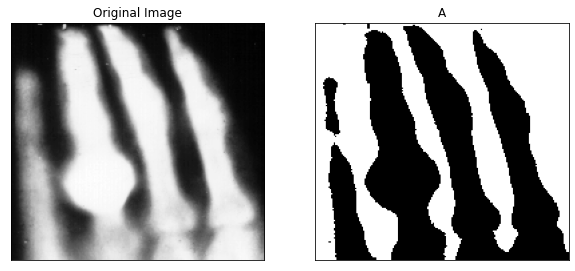

In [25]:
# this is a simple A image, as described in 'The MATH' section
A_hand = f.generateImages('skeleton')

<div class="alert alert-block alert-info">
<b> 
Did you know? A very famous physicist, Wilhelm Röntgen not only discovered X-rays, but also their medical use!  This occurred when he made a picture of his wife's hand on a photographic plate formed due to X-rays. The photograph of his wife's hand was the first photograph of a human body part using X-rays. When she saw the picture, she said "I have seen my death."
    
Image Credit: [X-Ray: Wikipedia](https://en.wikipedia.org/wiki/X-ray); assessed 18th February 2022.
</b> 
</div>

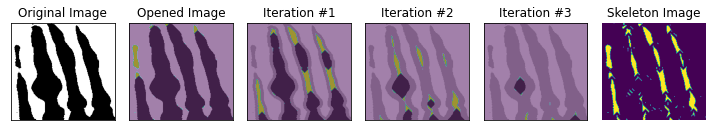

In [34]:
# RECALL:
B_cross = diamond(radius = 6)                     # <-- diamond structuring element   
B_square = square(width = 8)                      # <-- square structuring element

# f.skeletonizationSim
#   INPUTS: • target image,
#           • structuring element

f.skeletonizationSim(A_hand,B_cross)    

<div class="alert alert-block alert-success">
<b>
How does changing the structuring element affect the results? (i.e., How important is connectivity here?) Does the algorithm 'converge' faster or slower?  
<br>
    
Try some experiments:
    <ul>
        <li>changing the type of structuring element (square versus diamond), and</li>
        <li>adjusting the radius/width parameter of the structuring element.</li> 
        </ul>
</b> 
</div>

## **The APPLICATION**
### **Class Example**
Recall from class on 14th February, we applied the distance transform to isolate a single pixel inside of each cell.
<div>
<img src="supplemental/lecture_result.png" width="500"/>
</div>

<div class="alert alert-block alert-info">
<b> 
The code in the following cell generates the mask in the middle.
</b> 
</div>


In [35]:
from skimage import io, exposure, filters
from skimage.morphology import binary_closing, disk
import numpy as np

# Read image from disk.
animage = io.imread('supplemental/cells.tif')

# Gaussian smoothing to facilitate edge detection.
animage_smooth = filters.gaussian(animage, sigma=2, preserve_range=True)

# Contrast stretch.
animage_rescaled = exposure.rescale_intensity(
    animage_smooth, out_range=np.uint8)

# Local threshold.
amask = animage_rescaled >= filters.threshold_local(
                                                    animage_rescaled, 33, method='gaussian')

amask_closed = binary_closing(amask, disk(3))

### **Extension**
We can consider applying the skeletonization algorithm to the mask to minimally "thin" the borders between the cells. Then, we can partially reconstruct the skeletal border using dilation.

In [36]:
from skimage.morphology import skeletonize, binary_dilation
import matplotlib.pyplot as plt

# skeletonize?

Text(0.5, 1.0, 'Reconstructed')

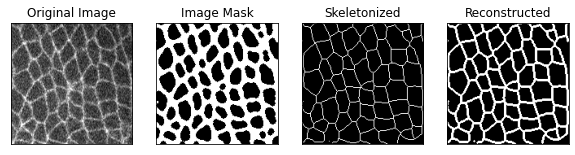

In [37]:
# skeletonize and partially reconstruct with dilation
strel = diamond(1)                             # <-- structuring element
skeleton = skeletonize(amask_closed)           # <-- skeletonize the mask
skel_recon = binary_dilation(skeleton,strel)   # <-- reconstruct with dilation
 
# display image, mask, skeleton and semi-reconstructed skeleton
fig, axes = plt.subplots(1, 4, figsize = (10,40))

axes[0].imshow(animage, cmap='binary_r')
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_title('Original Image')
axes[1].imshow(amask_closed, cmap='binary_r')
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_title('Image Mask')
axes[2].imshow(skeleton, cmap='binary_r')
axes[2].set_xticks([])
axes[2].set_yticks([])
axes[2].set_title('Skeletonized')
axes[3].imshow(skel_recon,cmap='binary_r')
axes[3].set_xticks([])
axes[3].set_yticks([])
axes[3].set_title('Reconstructed')

In [ ]:
# find the connected regions
img_labels,cell_num = label(skel_recon, background=1,
                            connectivity=2,return_num=True)

# display image, semi-reconstructed skeleton, and cell label map
fig, axes = plt.subplots(1, 3, figsize = (10,30))

axes[0].imshow(animage, cmap='binary_r')
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_title('Original Image')
axes[1].imshow(skel_recon,cmap='binary_r')
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_title('Reconstructed')
axes[2].imshow(img_labels)
axes[2].set_xticks([])
axes[2].set_yticks([])
axes[2].set_title('Labelled Image')
plt.tight_layout()
plt.show()
print('Number of cells detected: {}'.format(cell_num))

<div class="alert alert-block alert-warning">
<b>Task-Dependance and Subjectivity, continued...
    
Clearly, every choice that we make influences the final result in some way! The above method, as an example, does really well at segmenting the individual cells in the center of the image. However, it falls short on the cells found at the border of the image. Further, you can see that the choice of structuring element affects the final result in terms of overall cell shape and surrounding margins. 
    </b>
</div>

<div class="alert alert-block alert-success">
<b>
    
Try some experiments:
    <ul>
        <li>changing the shape or size of the structuring element for the morphological operations,</li>
        <li>applying different filters (e.g., `median` instead of `gaussian`), or</li> 
        <li>experimenting with the input parameters of `threshold_local`.</li>
        </ul>
</b> 
</div>

<div class="alert alert-block alert-info">
<b>
<h2><b>CONCLUSION</b></h2>
<br>  
<b>
Covered today:

<div>
<img src="supplemental/conclusion_figure.png" width="500"/>
</div>
    
|Algorithm     | Relevant Method |
| :---         |            ---: |
|Image Filling |`scipy.ndimage.morphology.binary_fill_holes`|
|Connected Components|`skimage.measure.label`|
|Skeletonization|`skimage.morphology.skeletonize`|
    
<br>
CHALLENGE! 
<br>
    
Try your hand at calculating the N:C ratio at `supplemental/NC_ratio.ipynb`.
</b> 
</div>